<h2 style="text-align:center;">Welcome to the fifth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to start data preprocessing process 
<br/>
<b>Learning outcomes:</b>
* to be able to explore patterns in data
* to perform categorical values encoding
</span>
<br/><br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory05". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_05_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr>

<span style="color:#011f4b">In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

<span style="color:#011f4b; font-size:16px;"><b>Label Encoder</b></span>

<span style="color:#011f4b">This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.
</span>

<span style="color:#011f4b"><b>Label Encoding in Python</b> can be achieved using <code>Sklearn Library</code>. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.
<br/>
Example, </span>

<span style="color:#011f4b"> Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called <b>‘One-Hot Encoding’</b>. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of bridge type and safety levels with one-hot encoding.</span>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [58]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("wine.csv")

<b>Inline</b> your matplotlib

In [6]:
%matplotlib inline

---

<b> Task 00 </b> Take the first look at your data

<p style="text-align:right; color:#1460AA;">+8
    points </p>

Think about the best way to discover your data at the first time. <br/> Read README file to understand the names of the columns

In [12]:
# Your code goes here
data = pd.read_csv("wine.csv", delimiter=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [17]:
# Your code goes here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


In [ ]:
# Your code goes here

---

<b> Task 01 </b> Hadling NaN values.

<p style="text-align:right; color:#1460AA;">+15
    points </p>

Calculate and visualize how many NaN valueas are there in your dataset. Calculate the percentage of NaNs. Choose the way you will handle NaNs - how are you going to restore them.

How many NaNs do you have. Answer as a text

In [51]:
def random_nans(data_):
    data = data_.copy()
    for i in range(np.random.randint(1200)):
        data.iloc[np.random.randint(4897),np.random.randint(0,12)] = np.NaN
    return data

In [52]:
data1 = random_nans(data)

In [61]:
dataset_of_nans = data1.isnull().sum()
dataset_of_nans

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 292
pH                        0
sulphates               306
alcohol                   0
quality                   0
dtype: int64

In [54]:
dataset_of_nans.describe()

count     12.000000
mean      75.166667
std      136.019941
min        0.000000
25%        0.000000
50%        0.000000
75%       73.000000
max      306.000000
dtype: float64

What are the persentage of NaNs. Answer as a text or output of a code snippet

In [55]:
data_pro = (data1.isnull().sum() / len(data)) * 100
data_pro

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 5.961617
pH                      6.206615
sulphates               6.247448
alcohol                 0.000000
quality                 0.000000
dtype: float64

<h3>This output shows us what percentage of all data we have Nans 

What NaNs are you going to restore - Answer as a text

<h3>I'm going to restore all Nans

How will you restore NaNs (by filling with means? modes? medians? or another way) and why. Answer as a text

<h3>I am going to use categorical median as this is the best solution 

Restore the NaNs

In [60]:
# Your code goes here
data1['pH'].fillna(data1.groupby('quality')['pH'].transform('median'), inplace = True)

In [66]:
dataset_of_nans = data1.isnull().sum()
dataset_of_nans

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 292
pH                        0
sulphates               306
alcohol                   0
quality                   0
dtype: int64

In [68]:
data1['density'].fillna(data1.groupby('quality')['density'].transform('median'), inplace = True)

In [69]:
dataset_of_nans = data1.isnull().sum()
dataset_of_nans

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates               306
alcohol                   0
quality                   0
dtype: int64

In [70]:
data1['sulphates'].fillna(data1.groupby('quality')['sulphates'].transform('median'), inplace = True)

In [71]:
dataset_of_nans = data1.isnull().sum()
dataset_of_nans

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

---

<b> Task 02 </b> Cleaning data - dropping unrelevant data and outliers

<p style="text-align:right; color:#1460AA;">+15
    points </p>

What features are unrelevant? Why? Answer as a text

<h3>Our dataset is very good and has very little missing data. 

Dropping unrelevant data

In [ ]:
# Your code goes here

In [ ]:
# Your code goes here

Detecting outliers

count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64

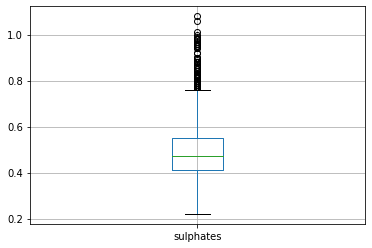

In [85]:
# Your code goes here
data.boxplot('sulphates')
data['sulphates'].describe()

count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64

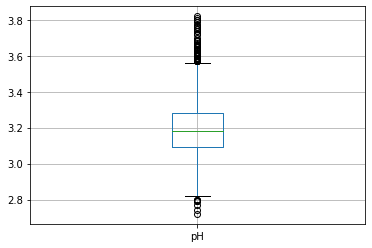

In [86]:
# Your code goes here
data.boxplot('pH')
data['pH'].describe()

Dropping outliers

In [89]:
# Your code goes here
def drop_out(x):
    l_75, l_25 = np.percentile(data.loc[:,x],[75,25])
    intr_l = l_75 - l_25
    
    max_ = l_75 + (1.5 * intr_l)
    min_ = l_25 - (1.5 * intr_l)
    
    data.loc[data[x] < min_, x] = np.nan
    data.loc[data[x] > max_, x] = np.nan

<AxesSubplot:>

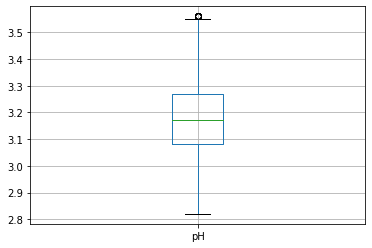

In [90]:
# Your code goes here
drop_out('pH')
data.boxplot('pH')

---

<b> Task 03 </b> Data types

<p style="text-align:right; color:#1460AA;">+5
    points </p>

Identify what are your categorical data and numerical data. Answer as a text or as an output of code snippet

In [28]:
dataset_of_cat = data.select_dtypes(include=['int64']).copy()
dataset_of_num = data.select_dtypes(include=['float64']).copy()

In [29]:
dataset_of_num

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [30]:
dataset_of_cat

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


<h3>There is only one categorical data in our dataset and this is the quality that evaluates our wine. 

---

In [92]:
data.rename(columns = {'citric acid': 'citric'}, inplace=True)

In [93]:
data.rename(columns = {'total sulfur dioxide': 'total_sd'}, inplace=True)

In [120]:
data.rename(columns = {'fixed acidity': 'fixed_acidity'}, inplace=True)

In [130]:
data.rename(columns = {'residual sugar': 'res_sugar'}, inplace=True)

<b>Task 04</b> Data Visualization 

Use different ways to visualize your categorical and numerical data 

<p style="text-align:right; color:#1460AA;">+20
    points </p>

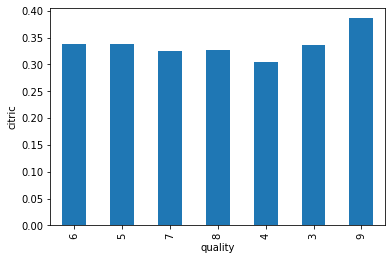

In [129]:
# Your code goes here
data.groupby([data['quality']], sort=False)['citric'].mean().plot(kind='bar')
plt.xlabel('quality')
plt.ylabel('citric')
plt.show()

<h5>This graph shows us the average values of citric acid in each quality, and it seems that they are about the same level. 

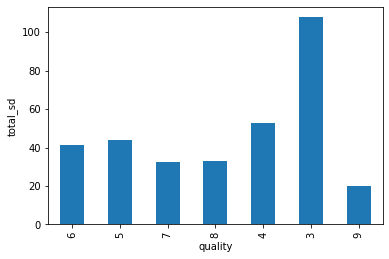

In [116]:
# Your code goes here
data.groupby([data['quality']], sort=False)['total_sd'].std().plot(kind='bar')
plt.xlabel('quality')
plt.ylabel('total_sd')
plt.show()

<h4>The graph shows that the standard deviation has a strong effect on quality 3, which indicates its instability in relation to others.

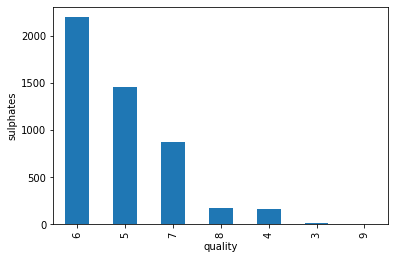

In [112]:
# Your code goes here
data.groupby([data['quality']], sort=False)['sulphates'].size().plot(kind='bar')
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

<h4>The graph shows us the size of sulfates in a certain quality, which means that most drinks with quality 6 

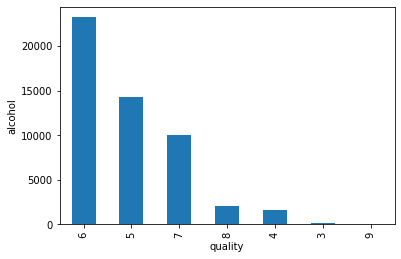

In [113]:
# Your code goes here
data.groupby([data['quality']], sort=False)['alcohol'].sum().plot(kind='bar')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<h4>This is a simple graph that shows where the most alcohol goes. 

---

<b> Task 05 </b> Relationships in your data

More advanced statistical analysis aims to identify patterns in data, for example, whether there is a link between two variables, or whether certain groups are more likely to show certain attributes.
<br/> <br/> We often collect data so that we can find patterns in the data, like numbers trending upwards or correlations between two sets of numbers.
Depending on the data and the patterns, sometimes we can see that pattern in a simple tabular presentation of the data. 
<br/><br/>Other times, it helps to visualize the data in a chart, like a time series, line graph, or scatter plot - you can use your visualization from Task 04.
<br/><br/>You also use correlation coefficient here, check [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) tutorial or [this](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) one, or [this](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec) one

<p style="text-align:right; color:#1460AA;">+20
    points </p>

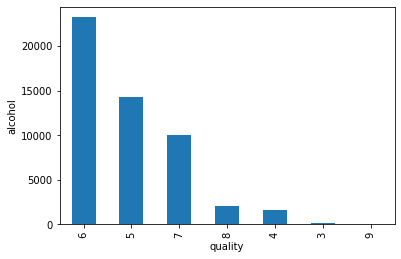

In [117]:
# Your code goes here
data.groupby([data['quality']], sort=False)['alcohol'].sum().plot(kind='bar')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<h4>This is a simple graph that shows where the most alcohol goes. 

In [118]:
labels = data['quality'].unique()

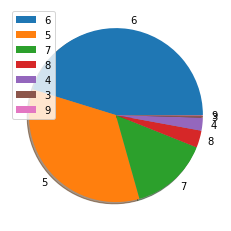

In [131]:
# Your code goes here
plt.pie(data.groupby([data['quality']], sort=False)['res_sugar'].sum(), labels = labels, shadow = True)
plt.legend()
plt.show()

<h4>The graph tells us where our sugar is being spent. And it shows us that the bulk goes to 6 and 5 

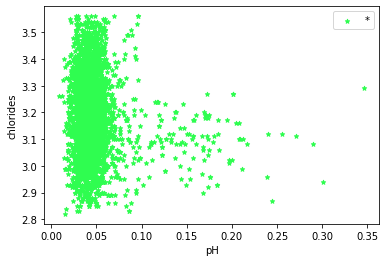

In [132]:
# Your code goes here
plt.scatter(data.chlorides, data.pH, 20, marker = '*', color = '#2Ffd50')
plt.legend(['*'])
plt.xlabel('pH')
plt.ylabel('chlorides')
plt.show()

<h4>The graph tells us how much the percentage of chlorine in the drink would not increase, its pH remains normal (0.2-0.6), with the exception of some data 

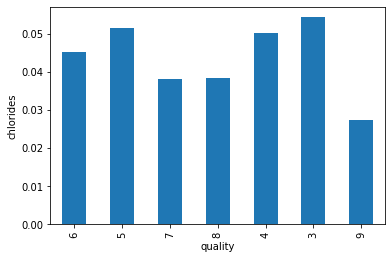

In [128]:
# Your code goes here
data.groupby([data['quality']], sort=False)['chlorides'].mean().plot(kind='bar')
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

<h4>This graph shows the average chlorine value for each quality, shows that they are more or less at the same level. 

---

<b>Task 06 </b> Categorical Data encoding (This task can be done later, until the next class)

<p style="text-align:right; color:#1460AA;">+15
    points </p>

Encode your categorical data

Use this [help](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) to perform Label Encoding and One-Hot Encoding on your categorical data

---

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! <br/> <br/> But don't stop practicing, remember - since you will be working with data, you have to understand its nature.
<br/> <br/> <b>Now</b> go to the Quiz 05
<br/> 

---